In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
plt.rcParams['figure.figsize'] = (11.0, 9.0)
%matplotlib inline

In [59]:
train = pd.read_csv('training.csv', low_memory=False)
test = pd.read_csv('predict.csv', low_memory=False)

In [3]:
# dividing into numerical and categorical 
cat = train.select_dtypes(include=['object'])
num = train.select_dtypes(exclude=['object'])

### Creating new features from posted_time

In [60]:
# complete date with hours
train['post'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms'))
train['post']

0      2017-12-23 17:26:40
1      2017-12-24 10:06:40
2      2017-12-24 12:53:20
3      2017-12-25 08:20:00
4      2017-12-25 08:20:00
               ...        
9413   2019-11-04 09:33:20
9414   2019-07-31 08:00:00
9415   2019-11-06 17:06:40
9416   2019-11-06 17:06:40
9417   2019-11-06 17:06:40
Name: post, Length: 9418, dtype: datetime64[ns]

In [61]:
train['post'].describe()

count                    9418
unique                   2688
top       2018-06-29 16:33:20
freq                      159
first     2013-06-25 06:00:00
last      2019-11-06 17:06:40
Name: post, dtype: object

In [64]:
# just date
train['post_date'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').date())
train['post_date']

0       2017-12-23
1       2017-12-24
2       2017-12-24
3       2017-12-25
4       2017-12-25
           ...    
9413    2019-11-04
9414    2019-07-31
9415    2019-11-06
9416    2019-11-06
9417    2019-11-06
Name: post_date, Length: 9418, dtype: object

In [65]:
# just hour
train['hour_of_day'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').time())
train['hour_of_day']

0       17:26:40
1       10:06:40
2       12:53:20
3       08:20:00
4       08:20:00
          ...   
9413    09:33:20
9414    08:00:00
9415    17:06:40
9416    17:06:40
9417    17:06:40
Name: hour_of_day, Length: 9418, dtype: object

In [68]:
# sorting by dates
train.sort_values(by='post_date', inplace=True)
train.set_index('post_date', drop=False, inplace=True)

start = pd.to_datetime('2017-12-23').date()
end = pd.to_datetime('2019-11-06').date()
# taking just two-year period 
two_year_df = train.loc[start : end]

In [69]:
two_year_df.head(10)

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank,post,post_date,hour_of_day
post_date,,,,,,,,,,,,,,,,,,,,,
2017-12-23,175339,1.514050e+12,1.514050e+12,6.315242e+10,6.315242e+10,other,57727,space,0.99973,1,...,0,0,1,other,1,0.23077,0.73677,2017-12-23 17:26:40,2017-12-23,17:26:40
2017-12-24,175348,1.514110e+12,1.515160e+12,6.309278e+10,6.204696e+10,forum,111913,space,0.99977,0,...,0,0,1,other,1,0.23077,0.78240,2017-12-24 10:06:40,2017-12-24,10:06:40
2017-12-24,175353,1.514120e+12,1.515160e+12,6.309049e+10,6.204716e+10,forum,111913,space,0.99977,0,...,0,0,1,marketing,1,0.23077,0.82125,2017-12-24 12:53:20,2017-12-24,12:53:20
2017-12-25,175372,1.514190e+12,1.514190e+12,6.301323e+10,6.301323e+10,other,9037,space,0.99949,0,...,0,0,1,marketing,1,0.23077,0.61522,2017-12-25 08:20:00,2017-12-25,08:20:00
2017-12-25,175419,1.514220e+12,1.514220e+12,6.298457e+10,6.298457e+10,other,114193,space,0.95633,0,...,0,0,1,marketing,1,0.23077,0.49929,2017-12-25 16:40:00,2017-12-25,16:40:00
2017-12-25,175418,1.514220e+12,1.514220e+12,6.298457e+10,6.298457e+10,other,114193,space,0.95633,0,...,0,0,1,marketing,1,0.23077,0.49929,2017-12-25 16:40:00,2017-12-25,16:40:00
2017-12-25,175417,1.514220e+12,1.514220e+12,6.298457e+10,6.298457e+10,other,114193,space,0.95633,0,...,0,0,1,marketing,1,0.23077,0.49929,2017-12-25 16:40:00,2017-12-25,16:40:00
2017-12-25,175407,1.514220e+12,1.514300e+12,6.299027e+10,6.290864e+10,wiki,50732,space,0.10000,0,...,0,0,1,other,1,0.23077,0.78207,2017-12-25 16:40:00,2017-12-25,16:40:00
2017-12-25,175405,1.514210e+12,1.514210e+12,6.299144e+10,6.299144e+10,other,114193,space,0.95633,0,...,0,0,1,marketing,1,0.23077,0.49975,2017-12-25 13:53:20,2017-12-25,13:53:20


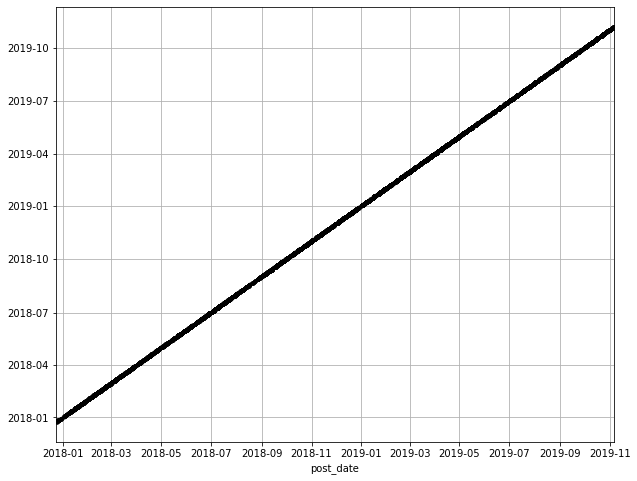

In [54]:
plt.figure(figsize=(10, 8))
two_year_df['post'].plot(style='k.')
plt.grid()
plt.show()

### All two-year period according to rank (y-axis)

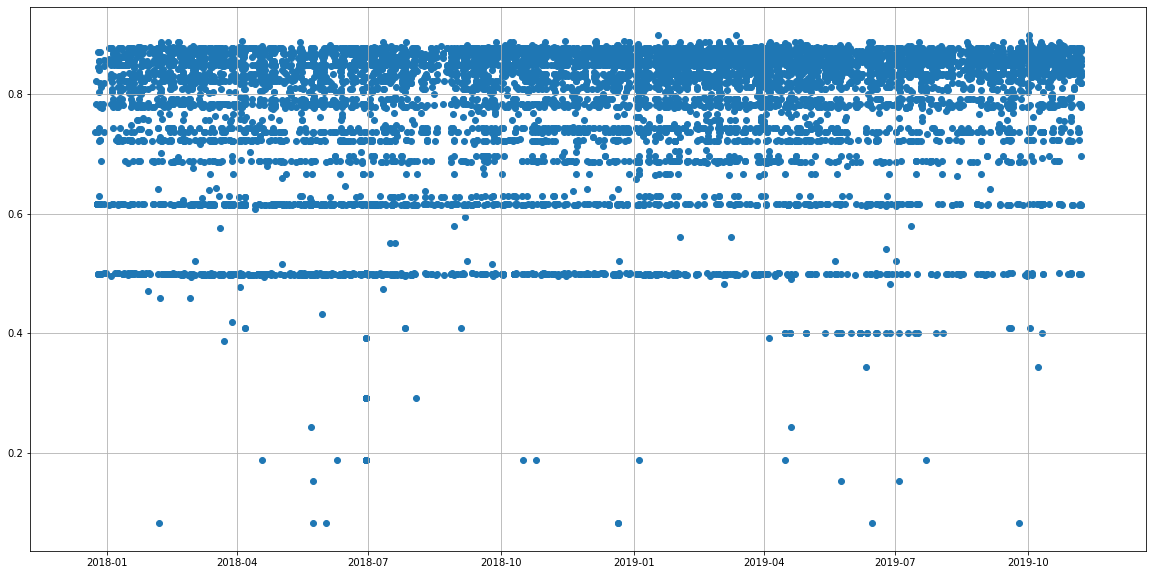

In [75]:
plt.figure(figsize=(20, 10))
plt.scatter(two_year_df['post'], two_year_df['rank'])
plt.grid()

### Linear dependency of posted_time and age (in days)

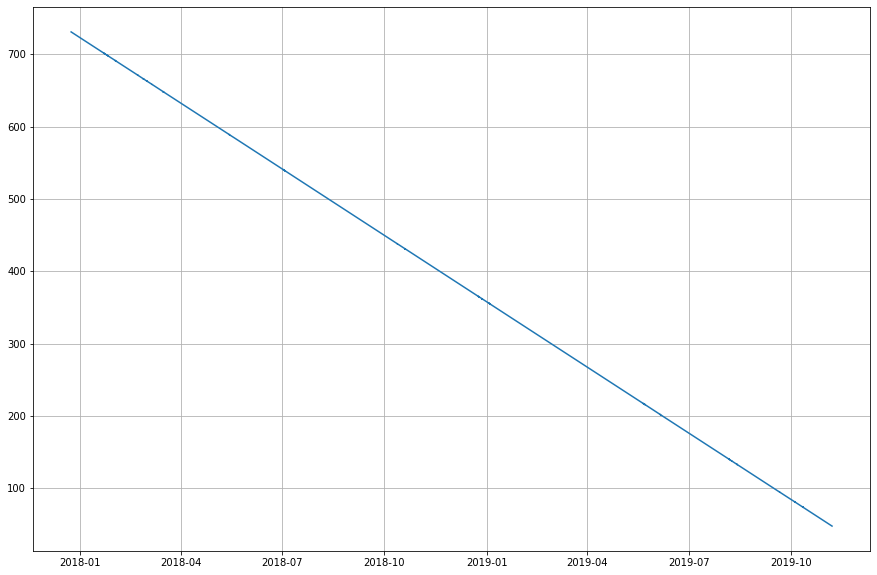

In [87]:
plt.figure(figsize=(15, 10))
plt.plot(two_year_df['post'], two_year_df['age']/(1000*3600*24))
plt.grid()

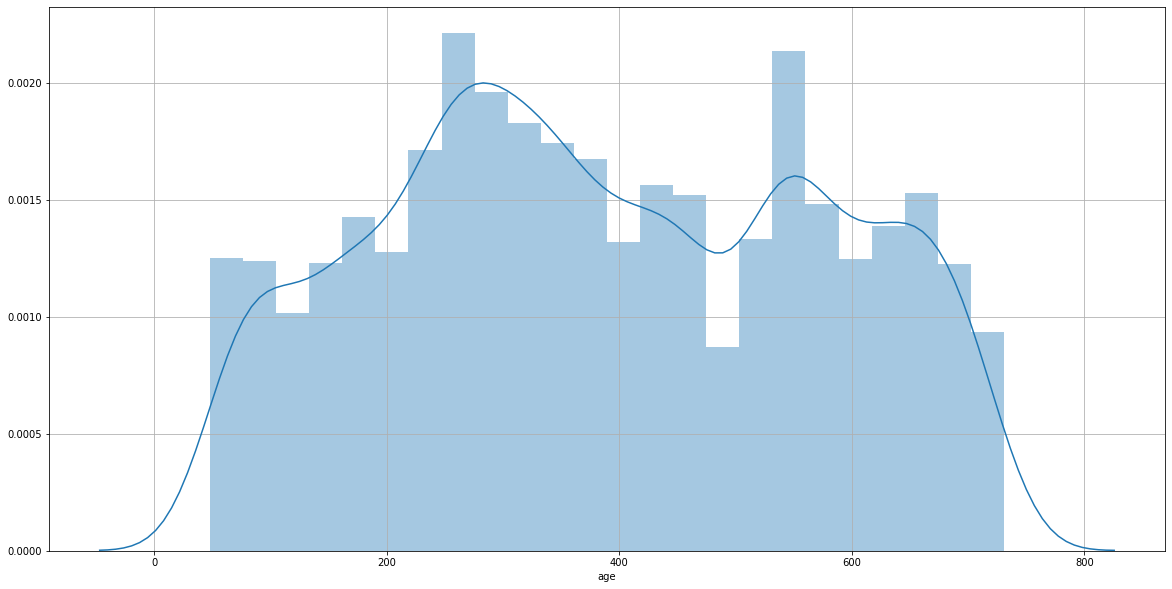

In [88]:
plt.figure(figsize=(20, 10))
sns.distplot(two_year_df['age']/(1000*3600*24))
plt.grid()

In [76]:
# day of a week - Monday == 1 to Sunday == 7
train['day_of_week'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').isoweekday())

### Day analysis

In [83]:
# choosing the day with the largest number of news
day1 = train.loc[train['post_date'] == datetime.date(2018, 6, 29)]

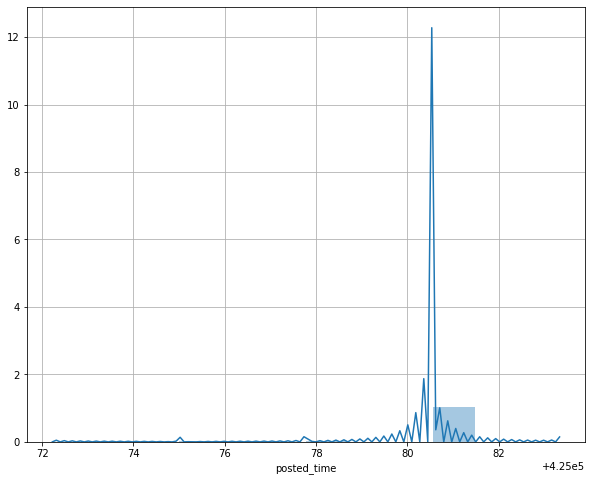

In [101]:
plt.figure(figsize=(10, 8))
sns.distplot(day1['posted_time']/(1000*3600))
plt.grid()

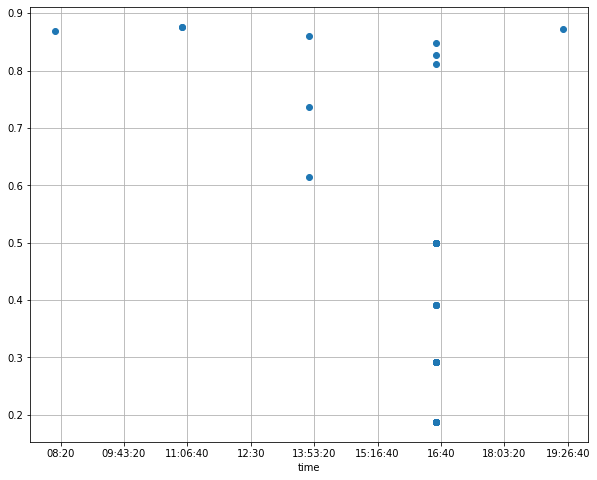

In [92]:
plt.figure(figsize = (10,8))
plt.plot_date(day1['hour_of_day'], day1['rank'])
plt.grid()
plt.show()

In [93]:
day2 = train.loc[train['post_date'] == datetime.date(2018, 3, 21)]

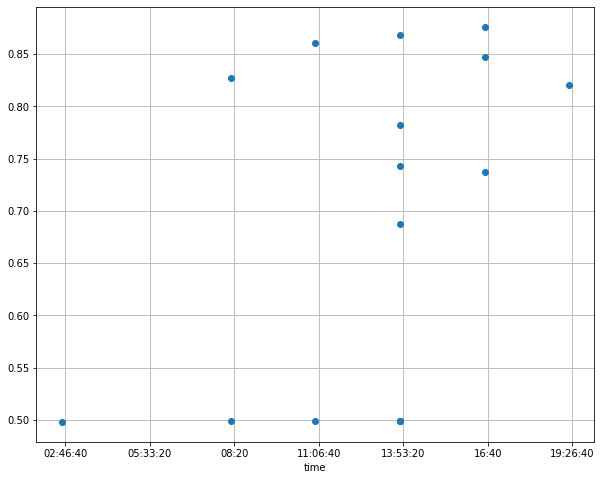

In [94]:
plt.figure(figsize = (10,8))
plt.plot_date(day2['hour_of_day'], day2['rank'])
plt.grid()
plt.show()

In [95]:
# selecting just one week (but there is no Saturday in this specific one)
start_date = pd.to_datetime('2019-10-28').date()
end_date = pd.to_datetime('2019-11-03').date()
week = train.loc[start_date : end_date]

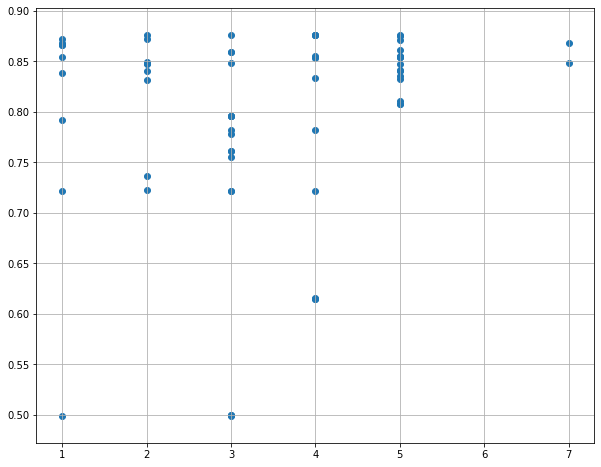

In [96]:
plt.figure(figsize = (10,8))
plt.scatter(week['day_of_week'], week['rank'])
plt.grid()
plt.show()

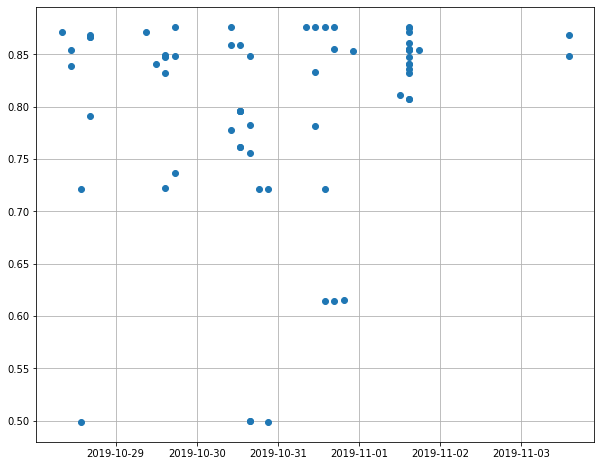

In [97]:
plt.figure(figsize = (10,8))
plt.plot_date(week['post'], week['rank'])
plt.grid()
plt.show()

## Skewness

In [83]:
num.columns

Index(['id', 'posted_time', 'updated_time', 'age', 'updated_age', 'owner_id',
       'owner_influence', 'number_of_likes', 'number_of_comments',
       'reactivity', 'is_mentions_me', 'is_mentions_connections',
       'is_commented_by_me', 'is_commented_by_connections', 'is_liked_by_me',
       'is_liked_by_connections', 'poster_id', 'poster_is_employee',
       'poster_is_lead', 'poster_is_in_connections', 'poster_order',
       'poster_influence', 'participant1_id', 'participant1_is_employee',
       'participant1_is_lead', 'participant1_is_in_connections',
       'participant1_order', 'participant1_influence', 'participant2_id',
       'participant2_is_employee', 'participant2_is_lead',
       'participant2_is_in_connections', 'participant2_order',
       'participant2_influence', 'participant3_id', 'participant3_is_employee',
       'participant3_is_lead', 'participant3_is_in_connections',
       'participant3_order', 'participant3_influence', 'participant4_id',
       'participant

In [93]:
# skewness for numerical features
from scipy.stats import skew
skewness = num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

number_of_comments                18.320102
is_mentions_me                    16.312248
is_commented_by_me                 7.653239
is_liked_by_me                     5.171519
number_of_likes                    3.112263
is_mentions_connections            1.812307
participant5_id                    1.330818
participant4_id                    1.049636
age                                0.957541
participant1_id                    0.877885
reactivity                         0.830732
participant2_id                    0.827636
participant5_is_employee           0.819263
participant3_id                    0.792841
updated_age                        0.624623
participant4_is_employee           0.512073
participant5_influence             0.406560
poster_id                          0.318065
participant3_is_employee           0.169645
owner_id                           0.167812
participant4_influence             0.055419
is_commented_by_connections        0.024211
poster_is_lead                  

In [91]:
skewed_cols = list(skewness[abs(skewness) > 1].index)
skewed_cols

['owner_influence',
 'number_of_likes',
 'number_of_comments',
 'is_mentions_me',
 'is_mentions_connections',
 'is_commented_by_me',
 'is_liked_by_me',
 'poster_is_in_connections',
 'poster_influence',
 'participant1_is_in_connections',
 'participant1_influence',
 'participant2_is_in_connections',
 'participant3_is_in_connections',
 'participant4_id',
 'participant4_is_in_connections',
 'participant5_id',
 'participant5_is_in_connections',
 'rank']

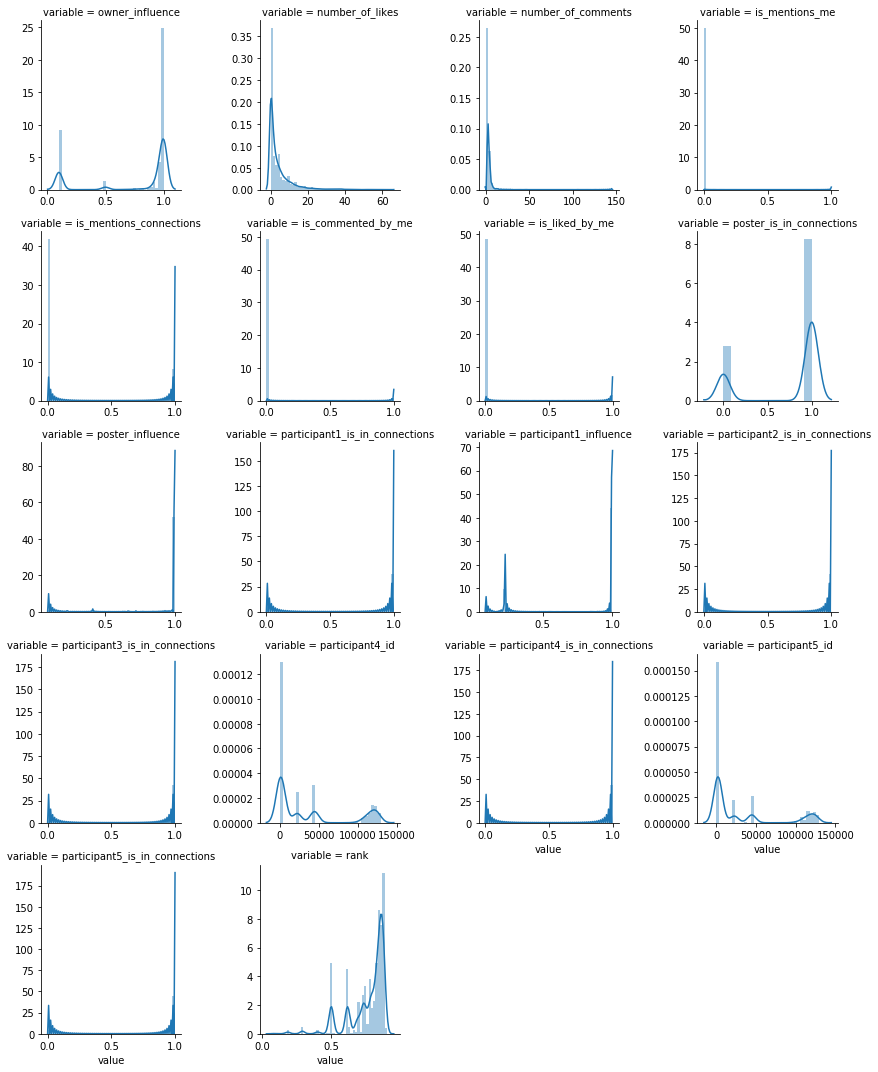

In [92]:
nd = pd.melt(train, value_vars = skewed_cols)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [95]:
train.poster_influence.describe()

count    9418.000000
mean        0.965250
std         0.151862
min         0.090910
25%         0.995860
50%         0.998060
75%         0.998950
max         0.999620
Name: poster_influence, dtype: float64